<h1>Zadanie 1 </h1>
Na początek stworzymy funkcję, która stworzy nam listę współczynników wielomianu i wypisze wielomian

In [2]:
#przydatne importy
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time

In [3]:
def wielomian(n):
    ciag_an = [random.randint(-10,10) for i in range(n)]
    wielomian = "p(x) = "
    for i in range(0,len(ciag_an)):
        wielomian += str(ciag_an[-(i+1)])+"x^"+str(len(ciag_an)-i-1)+"+"
    print(wielomian[:-4])
    return(ciag_an)
wielomian(3)

p(x) = 3x^2+-2x^1+-8


[-8, -2, 3]

a) naiwny algorytm liczenia wartości wielomianu w punkcie:
stworzymy funkcję która obliczy nam wartość w punkcie oraz ilość operacji potrzebnej do wykonania


In [4]:
def naiwny(an,x):
    """
    an - tablica zawierająca współczynniki wielomianu (od a_0 do a_n)
    x - punkt podstawiany pod wielomian
    funkcja wypisuje zestawienie ilości danych i ilości operacji, wynik obliczeń oraz zwraca ilość operacji jako zmienną
    """
    liczba_operacji = 0
    tab_x = [1 for i in range(len(an))]
    liczba_operacji += len(an)
    result=0

    for i in range(0,len(an)):
        liczba_operacji+=1
        for j in range(0,len(an)):
            if j<=i:
                tab_x[j] = tab_x[j] * 1
            else:
                tab_x[j] = tab_x[j] * x
            liczba_operacji+=1
        result += an[i]*tab_x[i]
        liczba_operacji += 1
    #print("p({}) = ".format(x) + str(result))
    #print("ilość danych:"+str(len(an))+", ilosc operacji:"+str(liczba_operacji))

    return(liczba_operacji)
naiwny(wielomian(3),2)

18

To, że jest to algorytm klasy O(n^2) pokażemy za pomocą wykresu. Wykonamy algorytm kilkukrotnie ze zwiększającą się liczbą danych i porównamy wykres do krzywej n^2

In [5]:
dane = [1,5,10,20,30,40,50,100,200,300,400,500]
wyniki = [naiwny(wielomian(el),1) for el in dane]

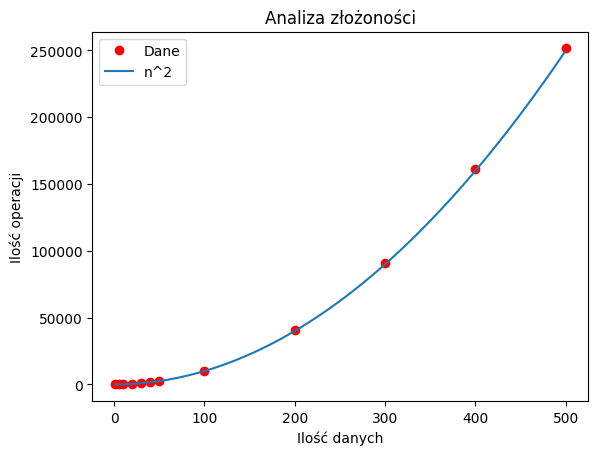

In [6]:
x_rang = np.arange(dane[0], dane[-1])
plt.plot(dane,wyniki,'ro',label="Dane")
plt.plot(x_rang, x_rang**2, label="n^2")
plt.xlabel("Ilość danych")
plt.ylabel("Ilość operacji")
plt.legend(loc='upper left')
plt.title("Analiza złożoności")
plt.show()

b) bardziej wydajny algorytm liczenia wartości w punkcie

In [16]:
def mniej_naiwny(an,x):
    result = 0
    licz_oper = 1
    tab_x = [1 for i in range(len(an))]
    for i in range(1,len(an)):
        licz_oper+=1
        if i == 1 :
            tab_x[i] = x
        else:
            k=i
            while k > 0:
                tab_x[i] *= tab_x[math.ceil(k/2)]
                k = k-math.ceil(k/2)
                licz_oper += 1
    #print("p({}) = ".format(x) + str(result))
    return(licz_oper)
mniej_naiwny(wielomian(3),2)

5

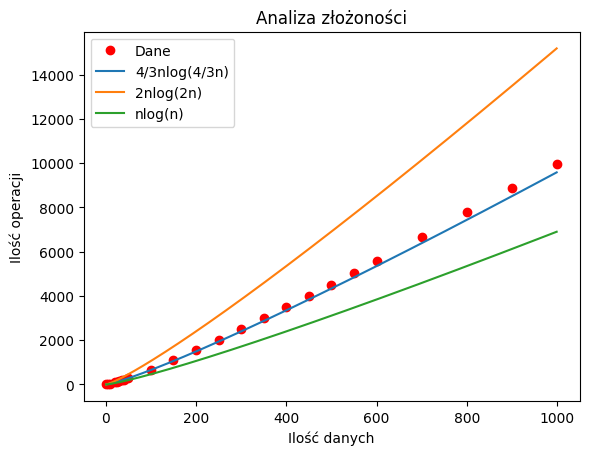

In [19]:
dane = [1,5,10,20,25,30,35,40,50,100,150,200,250,300,350,400,450,500,550,600,700,800,900,1000]
wyniki = [mniej_naiwny(wielomian(el),1) for el in dane]
x_rang = np.arange(dane[0], dane[-1])
plt.plot(dane,wyniki,'ro',label="Dane")
plt.plot(x_rang, 4/3*x_rang*np.log(4/3*x_rang), label="4/3nlog(4/3n)")
plt.plot(x_rang, 2*x_rang*np.log(2*x_rang), label="2nlog(2n)")
plt.plot(x_rang, x_rang*np.log(x_rang), label="nlog(n)")
plt.xlabel("Ilość danych")
plt.ylabel("Ilość operacji")
plt.legend(loc='upper left')
plt.title("Analiza złożoności")
plt.show()

c) obliczenie wielomianu za pomocą schematu hornera

In [22]:
wiel = wielomian(2)

p(x) = 1x^1+2


In [24]:
def horner(an,i,x):
    if i< len(an)-1:
        return (an[i] + x*horner(an,i+1,x))
    else:
        return an[i]

horner(wiel,0,2)

4

w tym kodzie policzymy ile operacji wykonuje się przy wywołaniu funkcji rekurencyjnie n razy

        operacja                |   ilość
        ==================================
        porównanie              |   n
        odwołanie do tablicy    |   n+1
        mnożenie                |   n+1
        dodawanie               |   n  
        ==================================
        suma                    |   4n+2



